In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
import matplotlib

In [2]:
%matplotlib notebook

In [3]:
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))

numpy version: 1.15.4
pandas version: 0.23.4
matplotlib version: 3.0.1


# Figure 6

Create Figure 6 (the host-galaxy offset of SNe in the ZTF BTS) in [Fremling et al. 2020](https://ui.adsabs.harvard.edu/abs/2019arXiv191012973F/abstract).

In [4]:
# BTS data
bts_df = pd.read_hdf('../data/final_rcf_table.h5')

In [6]:
z_sn = bts_df.z_sn.values
z_host = bts_df.z_host.values

norm_Ia = np.where( ( (bts_df.sn_type == 'Ia-norm') | 
                      (bts_df.sn_type == 'Ia') | 
                      (bts_df.sn_type == 'Ia-91bg') | 
                      (bts_df.sn_type == 'Ia-91T') | 
                      (bts_df.sn_type == 'Ia-99aa') | 
                      (bts_df.sn_type == 'ia')
                     | (bts_df.sn_type == 'Ia-norm*')
                     | (bts_df.sn_type == 'Ia-91T*')
                     | (bts_df.sn_type == 'Ia-91T**')
                     | (bts_df.sn_type == 'SN Ia')
                    )
                  )

norm_cc = np.where( (bts_df.sn_type == 'IIb') | 
                    (bts_df.sn_type == 'Ib') | 
                    (bts_df.sn_type == 'IIP') | 
                    (bts_df.sn_type == 'Ib/c') | 
                    (bts_df.sn_type == 'Ic-norm') | 
                    (bts_df.sn_type == 'IIn') | 
                    (bts_df.sn_type == 'IIL') | 
                    (bts_df.sn_type == 'Ic-broad') | 
                    (bts_df.sn_type == 'II') | 
                    (bts_df.sn_type == 'II-pec') | 
                    (bts_df.sn_type == 'Ib-pec') | 
                    (bts_df.sn_type == 'Ic') | 
                    (bts_df.sn_type == 'Ic-BL') | 
                    (bts_df.sn_type == 'IIP*') | 
                    (bts_df.sn_type == 'II*') | 
                    (bts_df.sn_type == 'Ibn') | 
                    (bts_df.sn_type == 'II**') | 
                    (bts_df.sn_type == 'Ib-norm') | 
                    (bts_df.sn_type == 'IIn*')
                  )

has_host_z = np.where((z_host > 0) & np.isfinite(z_host))
no_host = np.where((z_host < 0) | np.isnan(z_host))

has_host_cc = np.intersect1d(has_host_z, norm_cc)
has_host_ia = np.intersect1d(has_host_z, norm_Ia)

no_host_cc = np.intersect1d(no_host, norm_cc)
no_host_ia = np.intersect1d(no_host, norm_Ia)

z_mix = z_sn.copy()
z_mix[has_host_z] = z_host[has_host_z]

<IPython.core.display.Javascript object>


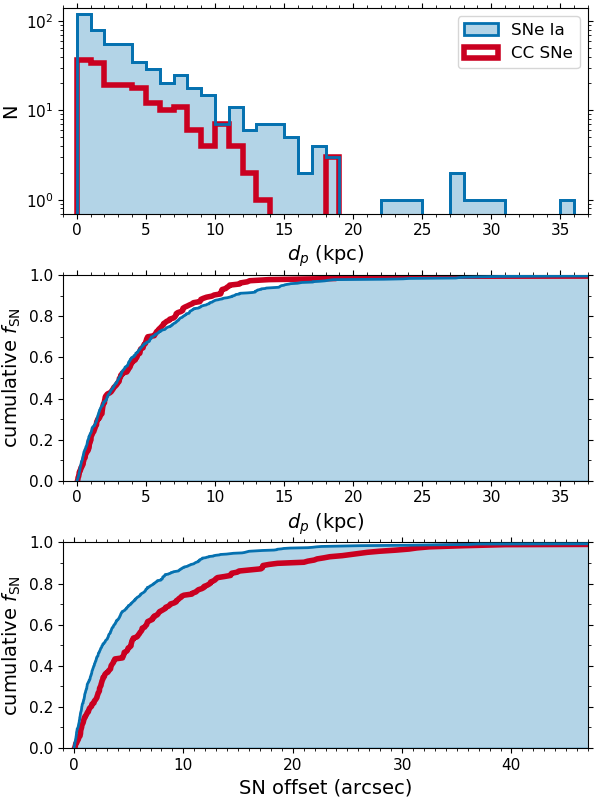

/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/adamamiller/miniconda3/envs/emcee3/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


In [7]:
color_dict = {'Ia': '#0571b0', 
              'cc': '#ca0020'}

fc = colorConverter.to_rgba(color_dict['Ia'], alpha=0.3)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,8))
ax1.hist(bts_df['projected_kpc'].iloc[norm_Ia], label = 'SNe Ia', 
         histtype='stepfilled', bins=40, range=(0,40),
         edgecolor=color_dict['Ia'], lw=2, 
         facecolor=fc)
ax1.hist(bts_df['projected_kpc'].iloc[norm_cc], label = 'CC SNe', 
        histtype='step', bins=40, range=(0,40),
        color=color_dict['cc'],lw=4)
ax1.hist(bts_df['projected_kpc'].iloc[norm_Ia].values,
         histtype='step', bins=40, range=(0,40),
         edgecolor=color_dict['Ia'], lw=2)
ax1.set_xlabel('projected separation (kpc)',fontsize=14)
ax1.set_yscale('log')
ax1.legend(fancybox=True,fontsize=12)


ia_kpc = bts_df['projected_kpc'].iloc[norm_Ia].values
ax2.fill_between(np.append(np.sort(ia_kpc[~np.isnan(ia_kpc)]), 100),
                 np.append(np.arange(sum(np.isfinite(ia_kpc)))/float(sum(np.isfinite(ia_kpc))), 1),
                 np.append(np.zeros_like( ia_kpc[~np.isnan(ia_kpc)]), 0),
                 color=fc)

ax2.plot(np.append(np.sort(ia_kpc[~np.isnan(ia_kpc)]), 100),
         np.append(np.arange(sum(np.isfinite(ia_kpc)))/float(sum(np.isfinite(ia_kpc))), 1),
         color=color_dict['Ia'], lw=2, zorder=10)

cc_kpc = bts_df['projected_kpc'].iloc[norm_cc].values
ax2.plot(np.append(np.sort(cc_kpc[~np.isnan(cc_kpc)]), 100),
         np.append(np.arange(sum(np.isfinite(cc_kpc)))/float(sum(np.isfinite(cc_kpc))), 1),
         color=color_dict['cc'], lw=4)

ia_sep = bts_df.sep.iloc[norm_Ia]
ax3.fill_between(np.append(np.sort(ia_sep[~np.isnan(ia_sep)]), 100),
                 np.append(np.arange(sum(np.isfinite(ia_sep)))/float(sum(np.isfinite(ia_sep))), 1),
                 np.append(np.zeros_like( ia_sep[~np.isnan(ia_sep)]), 0),
                 color=fc)

ax3.plot(np.append(np.sort(ia_sep[~np.isnan(ia_sep)]), 100),
         np.append(np.arange(sum(np.isfinite(ia_sep)))/float(sum(np.isfinite(ia_sep))), 1),
         color=color_dict['Ia'], lw=2, zorder=10)

cc_sep = bts_df.sep.iloc[norm_cc]
ax3.plot(np.append(np.sort(cc_sep[~np.isnan(cc_sep)]), 100),
         np.append(np.arange(sum(np.isfinite(cc_sep)))/float(sum(np.isfinite(cc_sep))), 1),
         color=color_dict['cc'], lw=4)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(top=True,right=True,labelsize=11,which='both')
    ax.set_xlim(-1,37)
    ax.set_ylim(0,1)
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_ylabel('cumulative $f_\mathrm{SN}$',fontsize=14)
    ax.set_xlabel('$d_p$ (kpc)',fontsize=14)

for ax in [ax2, ax3]:
    ax.yaxis.set_minor_locator(MultipleLocator(.1))

ax1.set_ylim(0.7,140)
ax1.set_ylabel('N',fontsize=14)
ax3.set_xlabel('SN offset (arcsec)',fontsize=14)
ax3.set_xlim(-1,47)

fig.subplots_adjust(left=0.105,bottom=0.065,top=0.99,right=0.98, hspace=0.3)
fig.savefig('host_separation_kpc.pdf')